In [12]:
import json
import numpy as np
import os
from glob import glob
from pprint import pprint
from pathlib import Path, PosixPath
import cv2
import matplotlib.pyplot as plt

In [4]:
def load_json(path):
    with open(path, 'r') as f:
        data = json.load(f)
    return data

def dump_json(path, data):
    Path(path).parent.mkdir(parents=True, exist_ok=True)
    with open(path, 'w') as f:
        json.dump(data, f)

In [5]:
path = '/aidata/anders/objects/landmarks/LS3D-W/annos/BDD_LS3D-W_68_lnmk_with_crop.json'
annos = load_json(path)

NameError: name 'xxx' is not defined

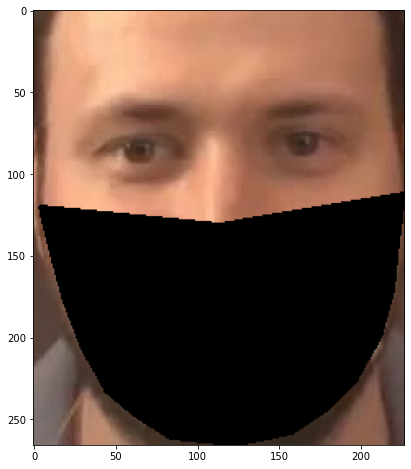

In [39]:
img_root = '/aidata/anders/objects/landmarks/LS3D-W/crop_imgs'

fig = plt.figure(figsize=(10, 8))
for frame in annos['frame_list']:
    name = frame['name']
    img_path = os.path.join(img_root, name)
    img = cv2.imread(img_path)
    for lb in frame['labels']:
        keypoints = lb['keypoints']
        tmp = []
        for key in keypoints.keys():
            kps = np.asarray(keypoints[key])
            tmp.append(kps)
        kps = np.concatenate(tmp, axis = 0)
    points = []
    #TODO: implemtents rules for mask a type
    for i in range(1, 16):
        points.append( kps[i][::-1])
        
    mask_a = [(kps[33][1], kps[15][0]),
              ((kps[39][1], kps[0][0])),
              (kps[30][1], kps[1][0])]
    mask_c = [tuple(kps[41][::-1])]
    mask_e = kps[43:48][::-1]
    mask_e = mask_e[:, ::-1].tolist()
    
    fmask_a = points + mask_a
    fmask_c = points + mask_c

    fmask_e = points + mask_e
    
    fmask_a = np.array(fmask_a, dtype=np.int32)
    fmask_c = np.array(fmask_c, dtype=np.int32)
    fmask_e = np.array(fmask_e, dtype=np.int32)
    
    # change parameter [mask_type] and color_type for various combination
    img2 = cv2.polylines(img, [fmask_c],isClosed=True, color=(0, 0, 0), thickness=2, lineType=cv2.LINE_8)
    # Using Python OpenCV – cv2.fillPoly() method to fill mask
    # change parameter [mask_type] and color_type for various combination
    img3 = cv2.fillPoly(img2, [fmask_c], color=(0, 0, 0), lineType=cv2.LINE_AA)
    # for pt in kps[39:48]:
        
    plt.imshow(img[..., ::-1])
    xxx

NameError: name 'xxx' is not defined

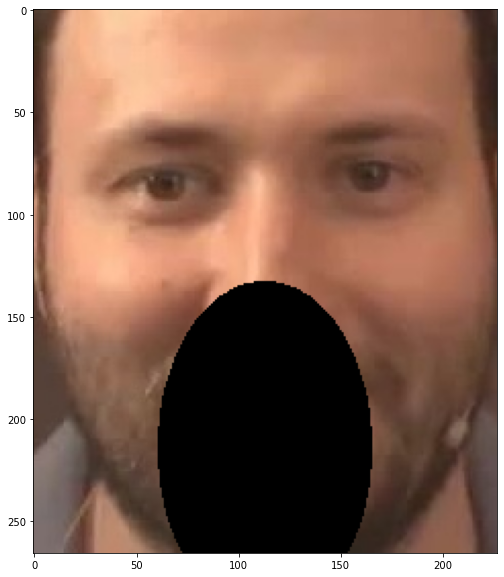

In [46]:
img_root = '/aidata/anders/objects/landmarks/LS3D-W/crop_imgs'

fig = plt.figure(figsize=(12, 10))
for frame in annos['frame_list']:
    name = frame['name']
    img_path = os.path.join(img_root, name)
    img = cv2.imread(img_path)
    for lb in frame['labels']:
        keypoints = lb['keypoints']
        tmp = []
        for key in keypoints.keys():
            kps = np.asarray(keypoints[key])
            tmp.append(kps)
        kps = np.concatenate(tmp, axis = 0)
    # Ellipse parameters for high, round coverage mask
    top_ellipse_high = kps[39][0] + (kps[40][0]  - kps[39][0]) / 2
    top_ellipse_medium = kps[40][0]
    top_ellipse_low = kps[41][0] + 0.33*(kps[37][1] - kps[31][1])
    top_ellipse = top_ellipse_low 
    centre_x = kps[39][1]
    centre_y = kps[8][0] - (kps[8][0] - top_ellipse )/ 2
    # (height of ellipse)
    axis_major = (kps[8][0] - top_ellipse) / 2
    # (width of ellipse)
    axis_minor = ((kps[13][1] - kps[3][1]) * 0.8) / 2

    centre_x = int(round(centre_x))
    centre_y = int(round(centre_y))
    axis_major = int(round(axis_major))
    axis_minor = int(round(axis_minor))

    centre = (centre_x, centre_y)
    axes = (axis_major, axis_minor)
    
    # change parameter [mask_type] and color_type for various combination
    img2 = cv2.ellipse(img, centre, axes, 0, 0, 360, (0, 0, 0), thickness=2)
    # Using Python OpenCV – cv2.fillPoly() method to fill mask
    # change parameter [mask_type] and color_type for various combination
    img3 = cv2.ellipse(img, centre, axes, 0, 0, 360, (0, 0, 0), thickness=-1)
    # for pt in kps[39:48]:
        
    plt.imshow(img[..., ::-1])
    xxx